In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "png"
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_dark"
from IPython.display import display

In [3]:
import warnings
import os
warnings.filterwarnings("ignore")

DATASET_FOLDER = "../dataset"

In [4]:
airports_path = f"{DATASET_FOLDER}/airports.csv" 
flights_path = f"{DATASET_FOLDER}/flights.csv"      

df_airports = pd.read_csv(airports_path)
df_flights = pd.read_csv(flights_path)

print(f"Airports data shape: {df_airports.shape}")
print(f"Flights data shape: {df_flights.shape}")

Airports data shape: (7184, 14)
Flights data shape: (523275, 28)


In [5]:
display(df_flights.head())
print(df_flights.columns)
display(df_flights.describe())

,actualOffBlockTime,aircraftRegistration,aircraftType.iatamain,aircraftType.iatasub,airlineCode,baggageClaim,estimatedLandingTime,expectedTimeBoarding,expectedTimeGateClosing,expectedTimeGateOpen,...,prefixICAO,publicEstimatedOffBlockTime,publicFlightState.flightStates,route.destinations,scheduleDate,scheduleTime,serviceType,terminal,transferPositions,transferPositions.transferPositions
0,NaN,NaN,NaN,NaN,148.0,NaN,NaN,NaN,NaN,NaN,...,ZXP,NaN,['SCH'],['AMS'],2018-01-01,03:02:07,P,NaN,NaN,NaN
1,NaN,PHPXY,AW1,NaN,148.0,NaN,NaN,NaN,NaN,NaN,...,ZXP,NaN,['SCH'],['AMS'],2018-01-01,03:16:00,NaN,NaN,NaN,NaN
2,NaN,NaN,AW1,NaN,148.0,NaN,NaN,NaN,NaN,NaN,...,ZXP,NaN,['SCH'],['AMS'],2018-01-01,03:16:29,P,NaN,NaN,NaN
3,2018-01-01T03:22:00.000+01:00,PHPXB,NaN,NaN,148.0,NaN,NaN,NaN,NaN,NaN,...,ZXP,NaN,['DEP'],['AMS'],2018-01-01,03:30:00,NaN,NaN,NaN,NaN
4,2018-01-01T05:58:22.000+01:00,PHHSJ,73H,73H,164.0,NaN,NaN,NaN,NaN,NaN,...,TRA,NaN,['DEP'],['SPC'],2018-01-01,06:00:00,J,1.0,NaN,NaN


Index(['actualOffBlockTime', 'aircraftRegistration', 'aircraftType.iatamain',
       'aircraftType.iatasub', 'airlineCode', 'baggageClaim',
       'estimatedLandingTime', 'expectedTimeBoarding',
       'expectedTimeGateClosing', 'expectedTimeGateOpen', 'expectedTimeOnBelt',
       'flightDirection', 'flightName', 'flightNumber', 'gate', 'id',
       'mainFlight', 'prefixIATA', 'prefixICAO', 'publicEstimatedOffBlockTime',
       'publicFlightState.flightStates', 'route.destinations', 'scheduleDate',
       'scheduleTime', 'serviceType', 'terminal', 'transferPositions',
       'transferPositions.transferPositions'],
      dtype='object')


,airlineCode,baggageClaim,estimatedLandingTime,expectedTimeOnBelt,flightNumber,id,terminal,transferPositions
count,521867.000000,0.0,0.0,0.0,521572.000000,5.232750e+05,494629.000000,0.0
mean,805.384765,NaN,NaN,NaN,5431.027120,1.241429e+17,1.581781,NaN
std,1319.735519,NaN,NaN,NaN,3416.845675,4.055064e+14,0.668756,NaN
min,6.000000,NaN,NaN,NaN,0.000000,1.234004e+17,1.000000,NaN
25%,64.000000,NaN,NaN,NaN,1731.000000,1.238009e+17,1.000000,NaN
50%,100.000000,NaN,NaN,NaN,6147.000000,1.241591e+17,1.000000,NaN
75%,1294.000000,NaN,NaN,NaN,8638.000000,1.244893e+17,2.000000,NaN
max,5108.000000,NaN,NaN,NaN,9999.000000,1.248968e+17,3.000000,NaN


In [6]:
display(df_airports.head())
print(df_airports.columns)
display(df_airports.describe())

,Airport,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


Index(['Airport', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz', 'Type', 'Source'],
      dtype='object')


,Airport,Latitude,Longitude,Altitude
count,7184.000000,7184.000000,7184.000000,7184.000000
mean,4672.248886,25.950874,-2.946702,1011.833101
std,3324.796152,28.239954,85.993653,1608.349308
min,1.000000,-90.000000,-179.876999,-1266.000000
25%,1853.750000,7.366353,-79.467924,66.000000
50%,3809.500000,34.262400,5.820455,354.000000
75%,7187.250000,47.290104,50.838224,1197.250000
max,12057.000000,82.517799,179.951004,14219.000000


In [7]:
print("Flights info:")
df_flights.info()
print("\Airports info:")
df_airports.info()

Flights info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523275 entries, 0 to 523274
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   actualOffBlockTime                   487716 non-null  object 
 1   aircraftRegistration                 495732 non-null  object 
 2   aircraftType.iatamain                521108 non-null  object 
 3   aircraftType.iatasub                 518308 non-null  object 
 4   airlineCode                          521867 non-null  float64
 5   baggageClaim                         0 non-null       float64
 6   estimatedLandingTime                 0 non-null       float64
 7   expectedTimeBoarding                 426919 non-null  object 
 8   expectedTimeGateClosing              426919 non-null  object 
 9   expectedTimeGateOpen                 414178 non-null  object 
 10  expectedTimeOnBelt                   0 non-null       float64
 11 

In [12]:
# Combine scheduleDate and scheduleTime into one datetime column for scheduled departure
df_flights['scheduledDeparture'] = pd.to_datetime(df_flights['scheduleDate'] + ' ' + df_flights['scheduleTime'])
df_flights['scheduledDeparture'] = df_flights['scheduledDeparture'].dt.tz_localize('UTC+01:00')

# Convert actualOffBlockTime to datetime (errors='coerce' handles any bad formats)
df_flights['actualOffBlockTime'] = pd.to_datetime(df_flights['actualOffBlockTime'], errors='coerce')

print(df_flights['scheduledDeparture'].dtype)
print(df_flights['actualOffBlockTime'].dtype)


# Compute delay in minutes (difference between actual and scheduled departure)
df_flights['delay_minutes'] = (df_flights['actualOffBlockTime'] - df_flights['scheduledDeparture']).dt.total_seconds() / 60

# Drop rows with missing delay values
df_flights.dropna(subset=['delay_minutes'], inplace=True)

# Optionally, you might want to treat early departures as 0 delay
df_flights['delay_minutes'] = df_flights['delay_minutes'].apply(lambda x: x if x > 0 else 0)

# Check basic summary statistics
print(df_flights['delay_minutes'].describe())

datetime64[ns, UTC+01:00]
datetime64[ns, UTC+01:00]
count    194005.000000
mean         14.662993
std          48.029228
min           0.000000
25%           1.216667
50%           6.000000
75%          14.983333
max        4685.350000
Name: delay_minutes, dtype: float64


In [13]:
df_flights["delay_minutes_log"] = np.log1p(df_flights["delay_minutes"])

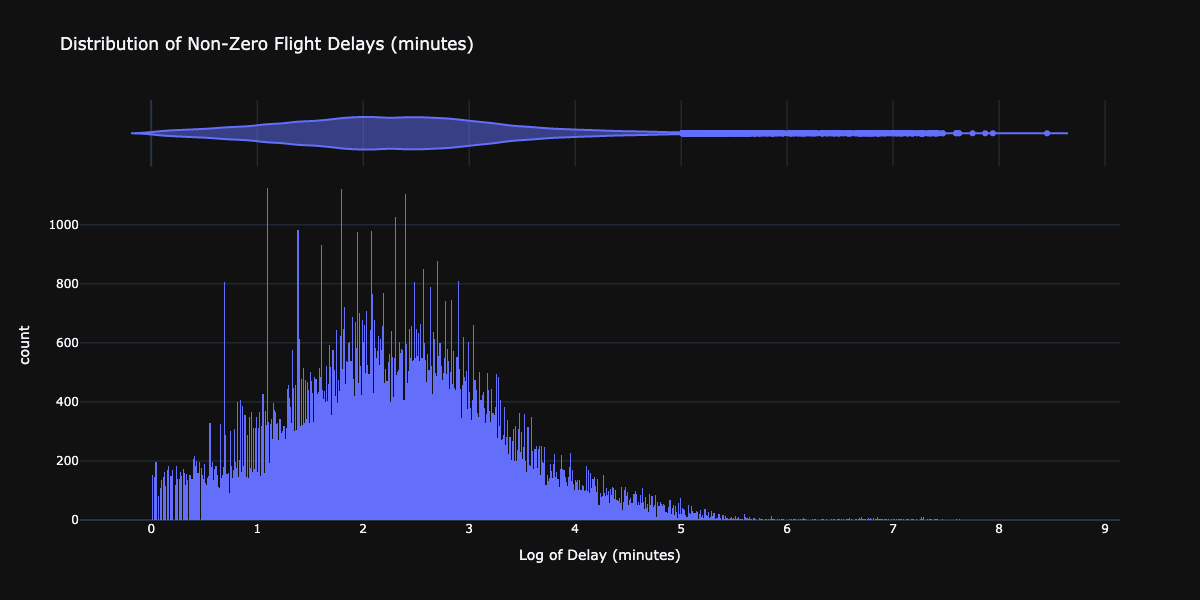

In [14]:
# Filter out rows with zero delays
non_zero_delays = df_flights[df_flights['delay_minutes_log'] > 0]

# Plot the histogram for non-zero delays
fig1 = px.histogram(
    non_zero_delays, 
    x='delay_minutes_log', 
    nbins=1500, 
    title="Distribution of Non-Zero Flight Delays (minutes)",
    labels={'delay_minutes_log': 'Log of Delay (minutes)'},
    marginal="violin",  # adds a violin plot to show distribution shape
)
fig1.update_layout(
    width=1200,
    height=600,  # set x-axis range to focus on delays < 300 minutes
)
fig1.show()

In [15]:
# Display pandas groupby view for count of flights that had 0 delay vs count that had non-zero-delay
delay_counts = df_flights['delay_minutes'].apply(lambda x: 'no_delay' if x == 0 else 'less_than_10_minutes_delay' if x <= 10 else 'more_than_10_minutes_delay').value_counts()
display(delay_counts)

# Calculate and display the class imbalance percentage
total_flights = delay_counts.sum()
no_delay_percentage = (delay_counts['no_delay'] / total_flights) * 100
zero_delay_percentage = (delay_counts['less_than_10_minutes_delay'] / total_flights) * 100
non_zero_delay_percentage = (delay_counts['more_than_10_minutes_delay'] / total_flights) * 100


print(f"Percentage of flights with no delay: {no_delay_percentage:.2f}%")
print(f"Percentage of flights with less_than_10_minutes delay: {zero_delay_percentage:.2f}%")
print(f"Percentage of flights with more_than_10_minutes delay: {non_zero_delay_percentage:.2f}%")


delay_minutes
less_than_10_minutes_delay    87107
more_than_10_minutes_delay    70235
no_delay                      36663
Name: count, dtype: int64

Percentage of flights with no delay: 18.90%
Percentage of flights with less_than_10_minutes delay: 44.90%
Percentage of flights with more_than_10_minutes delay: 36.20%


In [16]:
df_flights['num_destinations'] = df_flights['route.destinations'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)
df_flights['first_destination'] = df_flights['route.destinations'].apply(lambda x: eval(x)[0] if isinstance(x, str) and len(eval(x)) > 0 else None)

df_merged = pd.merge(
    df_flights, 
    df_airports, 
    how='left',
    left_on='first_destination', 
    right_on='IATA',
    suffixes=('', '_airport')
).dropna(subset=['IATA'])

# Now extract top-level region from something like "Europe/Paris" -> "Europe"
df_merged['region'] = df_merged['Tz'].str.split("/").str.get(0)

In [17]:
pd.set_option('display.max_columns', None)
display(df_merged.head())

,actualOffBlockTime,aircraftRegistration,aircraftType.iatamain,aircraftType.iatasub,airlineCode,baggageClaim,estimatedLandingTime,expectedTimeBoarding,expectedTimeGateClosing,expectedTimeGateOpen,expectedTimeOnBelt,flightDirection,flightName,flightNumber,gate,id,mainFlight,prefixIATA,prefixICAO,publicEstimatedOffBlockTime,publicFlightState.flightStates,route.destinations,scheduleDate,scheduleTime,serviceType,terminal,transferPositions,transferPositions.transferPositions,scheduledDeparture,delay_minutes,delay_minutes_log,num_destinations,first_destination,Airport,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source,region
0,2018-01-01 03:22:00+01:00,PHPXB,NaN,NaN,148.0,NaN,NaN,NaN,NaN,NaN,NaN,D,ZXP022,22.0,NaN,123414481790510775,ZXP022,NaN,ZXP,NaN,['DEP'],['AMS'],2018-01-01,03:30:00,NaN,NaN,NaN,NaN,2018-01-01 03:30:00+01:00,0.000000,0.000000,1,AMS,580.0,Amsterdam Airport Schiphol,Amsterdam,Netherlands,AMS,EHAM,52.308601,4.76389,-11.0,1,E,Europe/Amsterdam,airport,OurAirports,Europe
1,2018-01-01 05:58:22+01:00,PHHSJ,73H,73H,164.0,NaN,NaN,NaN,NaN,NaN,NaN,D,HV5641,5641.0,D59,123414479288269149,HV5641,HV,TRA,NaN,['DEP'],['SPC'],2018-01-01,06:00:00,J,1.0,NaN,NaN,2018-01-01 06:00:00+01:00,0.000000,0.000000,1,SPC,1053.0,La Palma Airport,Santa Cruz De La Palma,Spain,SPC,GCLA,28.626499,-17.75560,107.0,0,E,Atlantic/Canary,airport,OurAirports,Atlantic
2,2018-01-01 06:00:00+01:00,PHHSG,73H,73H,100.0,NaN,NaN,NaN,NaN,NaN,NaN,D,KL2533,2533.0,D86,123414479666542945,HV6455,KL,KLM,NaN,['DEP'],['LPA'],2018-01-01,06:05:00,J,1.0,NaN,NaN,2018-01-01 06:05:00+01:00,0.000000,0.000000,1,LPA,1054.0,Gran Canaria Airport,Gran Canaria,Spain,LPA,GCLP,27.931900,-15.38660,78.0,0,E,Atlantic/Canary,airport,OurAirports,Atlantic
3,2018-01-01 06:00:00+01:00,PHHSG,73H,73H,164.0,NaN,NaN,NaN,NaN,NaN,NaN,D,HV6455,6455.0,D86,123414479288365061,HV6455,HV,TRA,NaN,['DEP'],['LPA'],2018-01-01,06:05:00,J,1.0,NaN,NaN,2018-01-01 06:05:00+01:00,0.000000,0.000000,1,LPA,1054.0,Gran Canaria Airport,Gran Canaria,Spain,LPA,GCLP,27.931900,-15.38660,78.0,0,E,Atlantic/Canary,airport,OurAirports,Atlantic
4,2018-01-01 06:26:34+01:00,PHHXB,73H,73H,164.0,NaN,NaN,NaN,NaN,NaN,NaN,D,HV5801,5801.0,E08,123414479288274329,HV5801,HV,TRA,NaN,['DEP'],['TLV'],2018-01-01,06:15:00,J,1.0,NaN,NaN,2018-01-01 06:15:00+01:00,11.566667,2.531048,1,TLV,1590.0,Ben Gurion International Airport,Tel-aviv,Israel,TLV,LLBG,32.011398,34.88670,135.0,2,E,Asia/Jerusalem,airport,OurAirports,Asia


In [18]:
# Ensure no negative delays
df_merged['delay_minutes'] = df_merged['delay_minutes'].clip(lower=0)

# Create a log transform column (log(delay + 1))
df_merged['log_delay'] = np.log1p(df_merged['delay_minutes'])

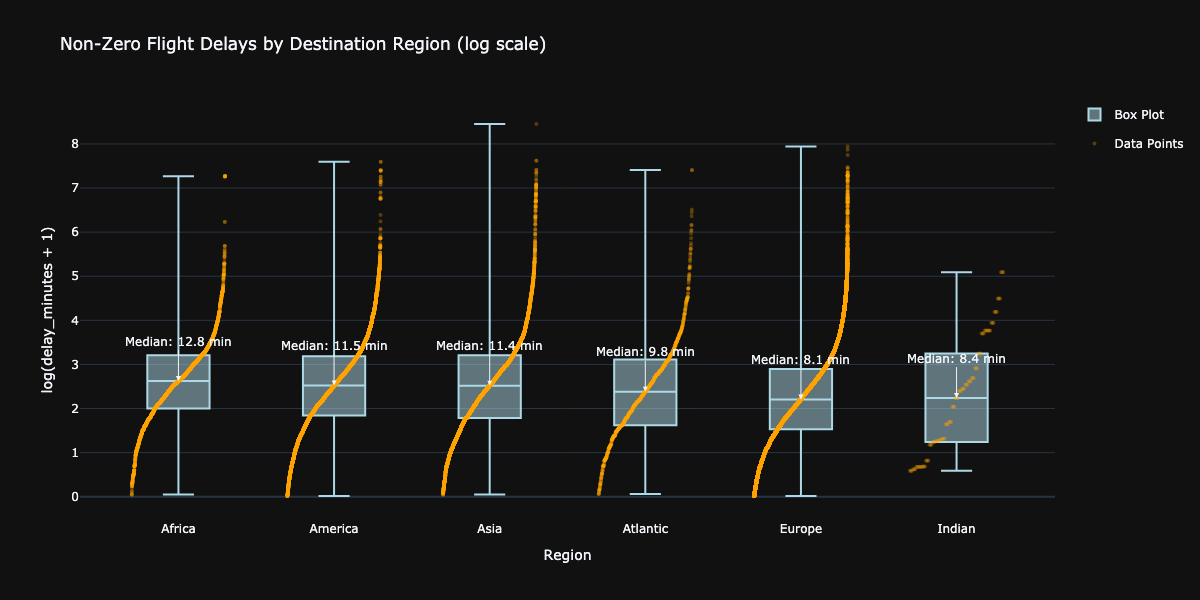

In [19]:
# Filter out \N region and sort remaining regions
regions_sorted = sorted([reg for reg in df_merged['region'].dropna().unique() if reg != '\\N'])
region_to_num = {reg: i for i, reg in enumerate(regions_sorted)}

fig = go.Figure()

for idx, reg in enumerate(regions_sorted):
    # Filter for the current region and non-zero delays
    subset = df_merged[(df_merged['region'] == reg) & (df_merged['log_delay'] > 0)]
    
    # Calculate median of actual delay (not log)
    median_delay = subset['delay_minutes'].median()
    
    # Add standard Box trace with increased width
    fig.add_trace(go.Box(
        x=[region_to_num[reg]] * len(subset),
        y=subset['log_delay'],
        name="Box Plot" if idx == 0 else None,
        legendgroup="BoxPlot",
        showlegend=(idx==0),
        boxpoints=False,
        marker_color='lightblue',
        line_color='lightblue',
        quartilemethod="linear",
        width=0.4
    ))
    
    # Sort the data points and compute evenly spaced jitter for x positions
    sorted_y = np.sort(subset['log_delay'])
    jitter = np.linspace(-0.3, 0.3, len(sorted_y))
    x_positions = region_to_num[reg] + jitter
    
    # Add Scatter trace for sorted data points overlay
    fig.add_trace(go.Scatter(
        x=x_positions,
        y=sorted_y,
        mode='markers',
        name="Data Points" if idx == 0 else None,
        legendgroup="Scatter",
        showlegend=(idx==0),
        marker=dict(color='orange', size=4, opacity=0.3)
    ))
    
    # Add annotation for median delay
    fig.add_annotation(
        x=region_to_num[reg],
        y=np.log1p(median_delay),  # Convert median delay to log scale for positioning
        text=f"Median: {median_delay:.1f} min",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40
    )

# Update Layout
fig.update_layout(
    title="Non-Zero Flight Delays by Destination Region (log scale)",
    xaxis=dict(
        title="Region",
        tickmode='array',
        tickvals=list(region_to_num.values()),
        ticktext=list(region_to_num.keys())
    ),
    yaxis=dict(
        title="log(delay_minutes + 1)"
    ),
    boxmode='group',
    width=1200,
    height=600,
)

fig.show()

## Exploring Features

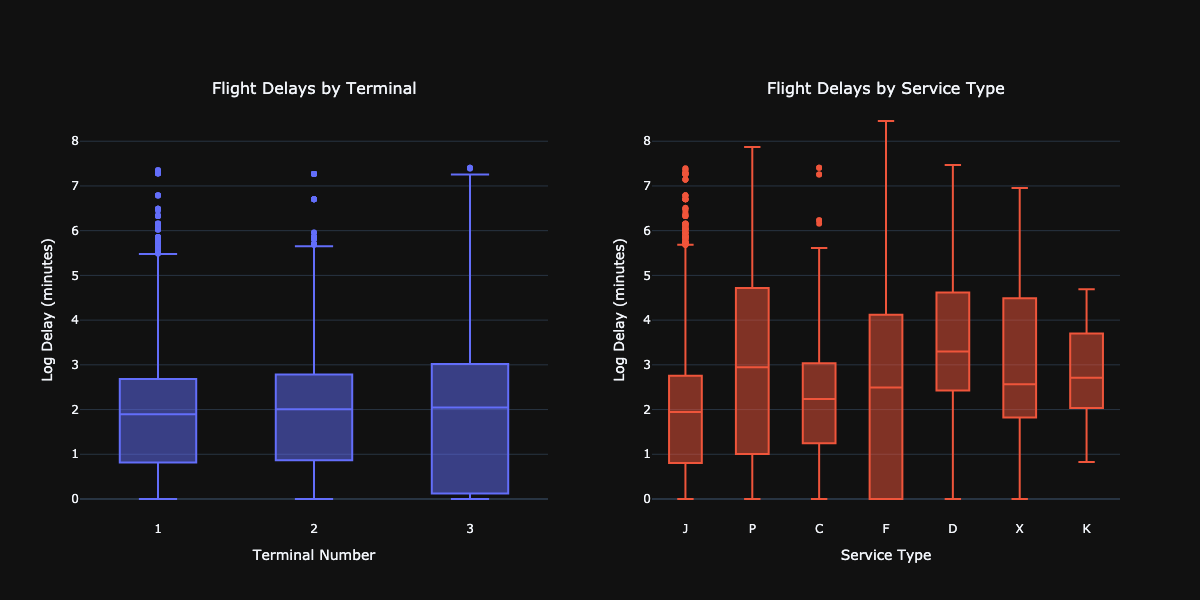

In [27]:
# Create subplot figure
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=["Flight Delays by Terminal", "Flight Delays by Service Type"])

# Add first box plot (terminal)
fig.add_trace(
    go.Box(
        x=df_merged['terminal'],
        y=df_merged['log_delay'],
        name='Terminal'
    ),
    row=1, col=1
)

# Add second box plot (serviceType)
fig.add_trace(
    go.Box(
        x=df_merged['serviceType'],
        y=df_merged['log_delay'],
        name='Service Type'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=600,
    width=1200,
    showlegend=False
)

# Update axes labels
fig.update_xaxes(title_text='Terminal Number', row=1, col=1)
fig.update_xaxes(title_text='Service Type', row=1, col=2)
fig.update_yaxes(title_text='Log Delay (minutes)', row=1, col=1)
fig.update_yaxes(title_text='Log Delay (minutes)', row=1, col=2)

fig.show()

### Static flight features

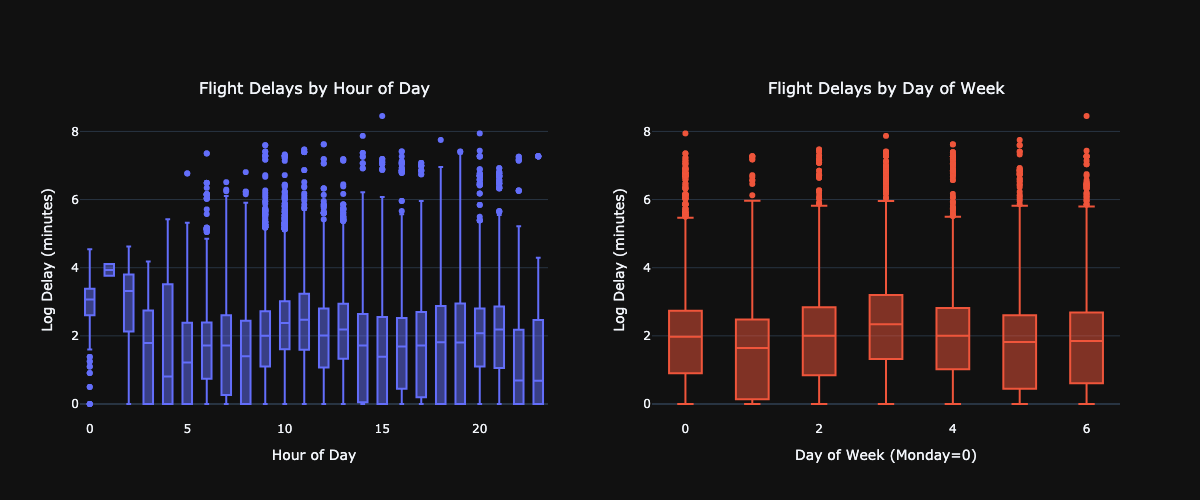

In [28]:
from plotly.subplots import make_subplots

# Create subplot figure
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=["Flight Delays by Hour of Day", "Flight Delays by Day of Week"])

# Add first box plot (hour)
df_merged['hour'] = df_merged['scheduledDeparture'].dt.hour
fig.add_trace(
    go.Box(
        x=df_merged['hour'],
        y=df_merged['log_delay'],
        name='Hour'
    ),
    row=1, col=1
)

# Add second box plot (day_of_week)
df_merged['day_of_week'] = df_merged['scheduledDeparture'].dt.dayofweek
fig.add_trace(
    go.Box(
        x=df_merged['day_of_week'],
        y=df_merged['log_delay'],
        name='Day of Week'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500,
    width=1200,
    showlegend=False
)

# Update axes labels
fig.update_xaxes(title_text='Hour of Day', row=1, col=1)
fig.update_xaxes(title_text='Day of Week (Monday=0)', row=1, col=2)
fig.update_yaxes(title_text='Log Delay (minutes)', row=1, col=1)
fig.update_yaxes(title_text='Log Delay (minutes)', row=1, col=2)

fig.show()

### Lag features

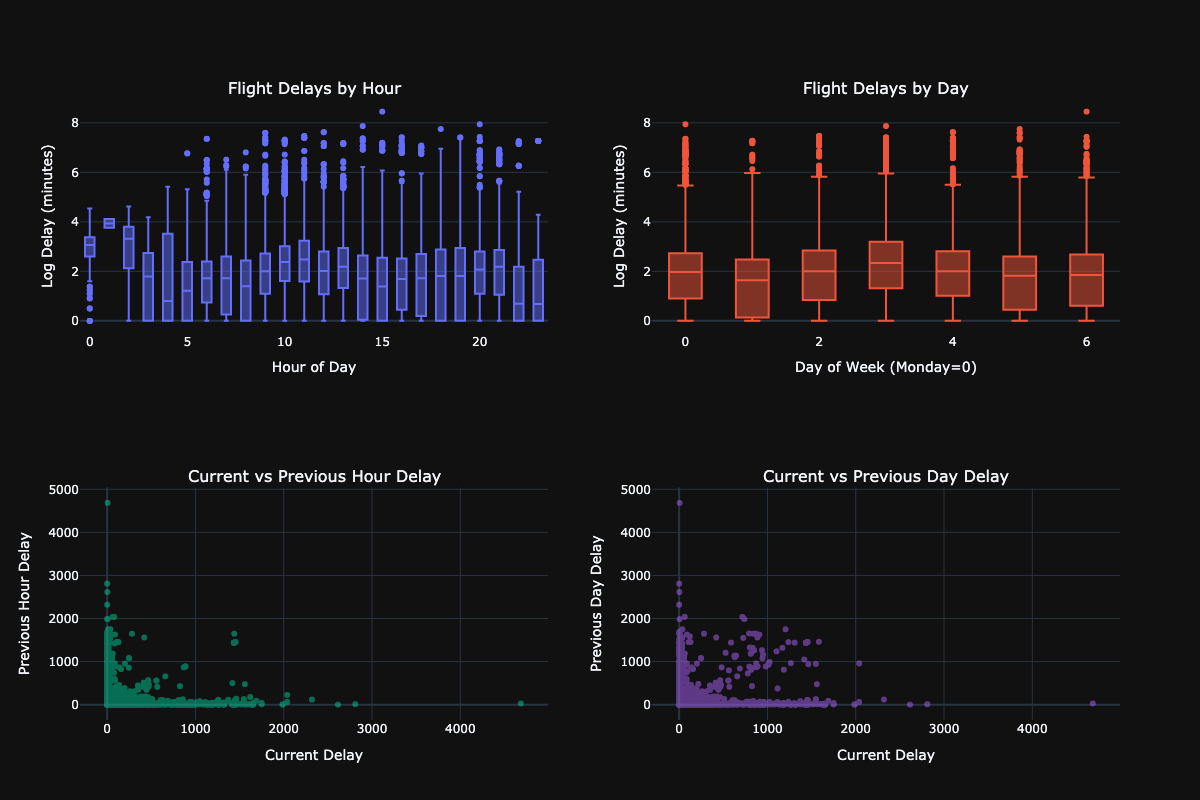

In [30]:
# Create lag features for delays
df_merged['delay_previous_hour'] = df_merged.groupby('hour')['delay_minutes'].shift(1)
df_merged['delay_previous_day'] = df_merged.groupby('day_of_week')['delay_minutes'].shift(1)

# Create subplot figure with lag features
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=["Flight Delays by Hour", 
                                  "Flight Delays by Day",
                                  "Current vs Previous Hour Delay",
                                  "Current vs Previous Day Delay"])

# First plot: Delays by hour
fig.add_trace(
    go.Box(
        x=df_merged['hour'],
        y=df_merged['log_delay'],
        name='Hour'
    ),
    row=1, col=1
)

# Second plot: Delays by day
fig.add_trace(
    go.Box(
        x=df_merged['day_of_week'],
        y=df_merged['log_delay'],
        name='Day'
    ),
    row=1, col=2
)

# Third plot: Current vs Previous Hour scatter
fig.add_trace(
    go.Scatter(
        x=df_merged['delay_minutes'],
        y=df_merged['delay_previous_hour'],
        mode='markers',
        opacity=0.5,
        name='Hour Lag'
    ),
    row=2, col=1
)

# Fourth plot: Current vs Previous Day scatter
fig.add_trace(
    go.Scatter(
        x=df_merged['delay_minutes'],
        y=df_merged['delay_previous_day'],
        mode='markers',
        opacity=0.5,
        name='Day Lag'
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    width=1200,
    showlegend=False,
)

# Update axes labels
fig.update_xaxes(title_text='Hour of Day', row=1, col=1)
fig.update_xaxes(title_text='Day of Week (Monday=0)', row=1, col=2)
fig.update_xaxes(title_text='Current Delay', row=2, col=1)
fig.update_xaxes(title_text='Current Delay', row=2, col=2)
fig.update_yaxes(title_text='Log Delay (minutes)', row=1, col=1)
fig.update_yaxes(title_text='Log Delay (minutes)', row=1, col=2)
fig.update_yaxes(title_text='Previous Hour Delay', row=2, col=1)
fig.update_yaxes(title_text='Previous Day Delay', row=2, col=2)

fig.show()

### Aggregated features

In [33]:
# --- 1. Data Preparation ---
# Assume df is your merged DataFrame (flights merged with airports to include 'region')
# Also assume 'scheduledDeparture' is already a datetime object and 'delay_minutes' is numeric.
# If not, ensure you convert them accordingly.

# Create a new column for the flight day (using scheduledDeparture date)
df_merged['scheduleDate'] = df_merged['scheduledDeparture'].dt.date

# --- 2. Define Functions for Aggregation ---
# Function to compute the cumulative (aggregated) average delay
def compute_cumulative_avg(group):
    group = group.sort_values('scheduledDeparture')
    avg_delays = []
    for _, row in group.iterrows():
        # Only consider flights that have scheduledDeparture < (current flight's scheduledDeparture - 2 hours)
        cutoff = row['scheduledDeparture'] - pd.Timedelta(hours=2)
        earlier = group[group['scheduledDeparture'] < cutoff]
        if len(earlier) > 0:
            avg_delay = earlier['delay_minutes'].mean()
        else:
            avg_delay = np.nan  # Could also choose 0 if you prefer
        avg_delays.append(avg_delay)
    return pd.Series(avg_delays, index=group.index)

# Function to compute the cumulative count of flights
def compute_cumulative_count(group):
    group = group.sort_values('scheduledDeparture')
    counts = []
    for _, row in group.iterrows():
        cutoff = row['scheduledDeparture'] - pd.Timedelta(hours=2)
        earlier = group[group['scheduledDeparture'] < cutoff]
        counts.append(len(earlier))
    return pd.Series(counts, index=group.index)

# --- 3. Compute Aggregated Features ---

# Overall daily aggregated features
df_merged['agg_avg_delay_overall'] = df_merged.groupby('scheduleDate', group_keys=False).apply(compute_cumulative_avg)
df_merged['agg_count_overall'] = df_merged.groupby('scheduleDate', group_keys=False).apply(compute_cumulative_count)

# Aggregation by terminal (for flights on the same day and same terminal)
df_merged['agg_avg_delay_terminal'] = df_merged.groupby(['scheduleDate', 'terminal'], group_keys=False).apply(compute_cumulative_avg)
df_merged['agg_count_terminal'] = df_merged.groupby(['scheduleDate', 'terminal'], group_keys=False).apply(compute_cumulative_count)

# Aggregation by region (for flights on the same day and same region)
df_merged['agg_avg_delay_region'] = df_merged.groupby(['scheduleDate', 'region'], group_keys=False).apply(compute_cumulative_avg)
df_merged['agg_count_region'] = df_merged.groupby(['scheduleDate', 'region'], group_keys=False).apply(compute_cumulative_count)

# --- 4. Post-Processing ---
# Replace NaN values (where there were no prior flights) with 0 (or another suitable value)
agg_cols = ['agg_avg_delay_overall', 'agg_avg_delay_terminal', 'agg_avg_delay_region',
            'agg_count_overall', 'agg_count_terminal', 'agg_count_region']

for col in agg_cols:
    df_merged[col] = df_merged[col].fillna(0)

# Check the new aggregated features
display(df_merged[['scheduledDeparture', 'delay_minutes', 'agg_avg_delay_overall', 'agg_count_overall',
          'agg_avg_delay_terminal', 'agg_count_terminal',
          'agg_avg_delay_region', 'agg_count_region']].head(10))

         scheduledDeparture  delay_minutes  agg_avg_delay_overall  \
0 2018-01-01 03:30:00+01:00       0.000000                    0.0   
1 2018-01-01 06:00:00+01:00       0.000000                    0.0   
2 2018-01-01 06:05:00+01:00       0.000000                    0.0   
3 2018-01-01 06:05:00+01:00       0.000000                    0.0   
4 2018-01-01 06:15:00+01:00      11.566667                    0.0   
5 2018-01-01 06:20:00+01:00      10.183333                    0.0   
6 2018-01-01 06:20:00+01:00      10.183333                    0.0   
7 2018-01-01 06:20:00+01:00       3.000000                    0.0   
8 2018-01-01 06:20:00+01:00      10.183333                    0.0   
9 2018-01-01 06:20:00+01:00       3.000000                    0.0   

   agg_count_overall  agg_avg_delay_terminal  agg_count_terminal  \
0                  0                     0.0                   0   
1                  1                     0.0                   0   
2                  1                

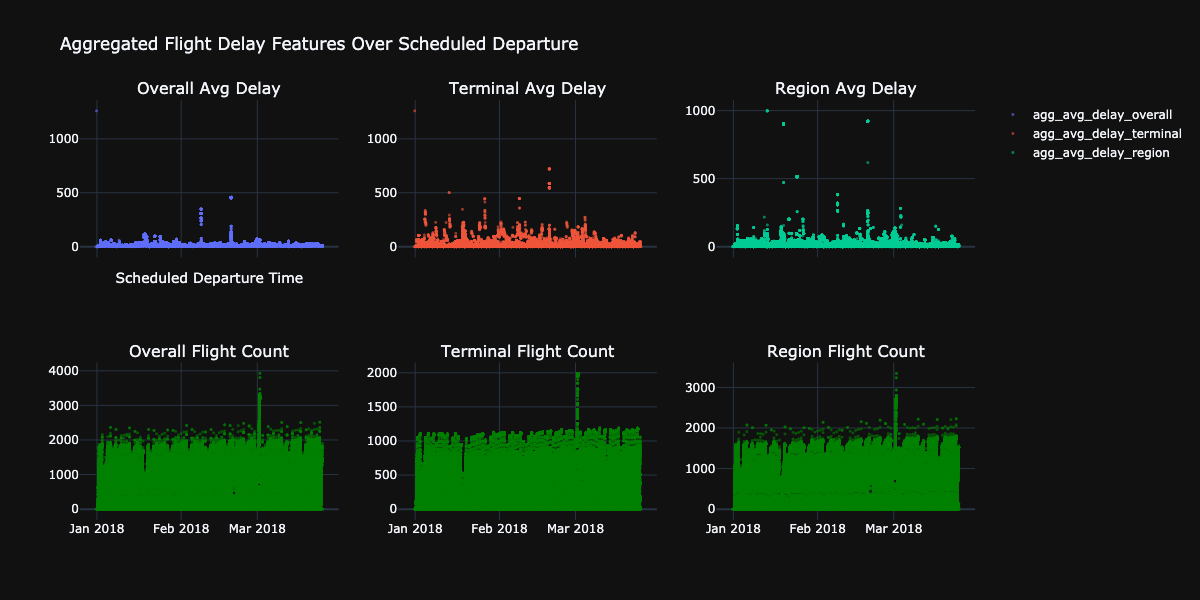

In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of aggregated feature names and titles for the subplots
avg_features = [
    "agg_avg_delay_overall", 
    "agg_avg_delay_terminal", 
    "agg_avg_delay_region", 
]
avg_titles = [
    "Overall Avg Delay", 
    "Terminal Avg Delay", 
    "Region Avg Delay", 
]

count_features = [
    "agg_count_overall", 
    "agg_count_terminal", 
    "agg_count_region", 
]
count_titles = [
    "Overall Flight Count", 
    "Terminal Flight Count", 
    "Region Flight Count", 
]

# Create a subplot grid: 2 rows, 4 columns
fig = make_subplots(rows=2, cols=3,
                    subplot_titles=avg_titles + count_titles,
                    shared_xaxes=True)

# Row 1: Aggregated Average Delays
for i, feature in enumerate(avg_features):
    row = 1
    col = i + 1
    fig.add_trace(
        go.Scatter(
            x=df_merged['scheduledDeparture'],
            y=df_merged[feature],
            mode='markers',
            marker=dict(size=3, opacity=0.6),
            name=feature
        ),
        row=row, col=col
    )
    
# Row 2: Aggregated Counts
for i, feature in enumerate(count_features):
    row = 2
    col = i + 1
    fig.add_trace(
        go.Scatter(
            x=df_merged['scheduledDeparture'],
            y=df_merged[feature],
            mode='markers',
            marker=dict(size=3, opacity=0.6, color='green'),
            name=feature,
            showlegend=False
        ),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600,
    width=1200,
    title_text="Aggregated Flight Delay Features Over Scheduled Departure",
    xaxis_title="Scheduled Departure Time",
)
# Optionally update x-axis type if you want to see the datetime ticks nicely:
# fig.update_xaxes(rangeselector=dict(buttons=list([
#     dict(count=1, label="1d", step="day", stepmode="backward"),
#     dict(count=7, label="1w", step="day", stepmode="backward"),
#     dict(step="all")
# ])))

fig.show()

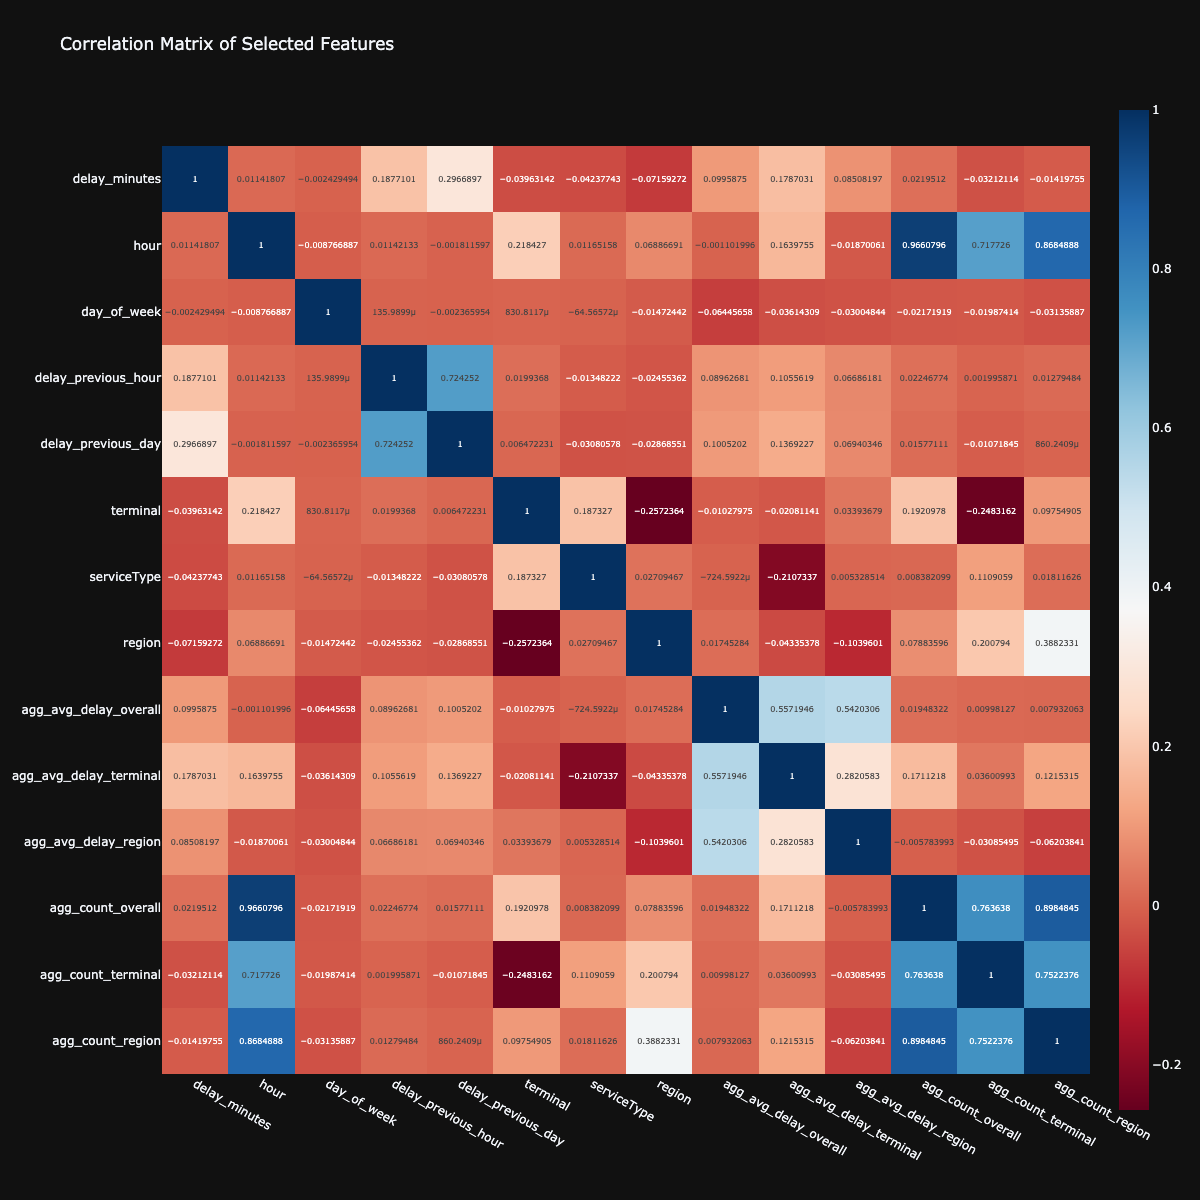

In [38]:
num_features = ['delay_minutes', 'hour', 'day_of_week', "delay_previous_hour", "delay_previous_day"]
# convert some categorical features to numerical
df_merged['terminal'] = pd.Categorical(df_merged['terminal']).codes
df_merged['serviceType'] = pd.Categorical(df_merged['serviceType']).codes
df_merged['region'] = pd.Categorical(df_merged['region']).codes

# combine features to a single list
num_features = num_features + ['terminal', 'serviceType', 'region']

# combine aggregated features to the list
num_features = num_features + ['agg_avg_delay_overall', 'agg_avg_delay_terminal', 'agg_avg_delay_region',
                               'agg_count_overall', 'agg_count_terminal', 'agg_count_region']

# plot correlation matrix
corr_matrix = df_merged[num_features].corr()

fig4 = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale="RdBu",
    title="Correlation Matrix of Selected Features"
)
fig4.update_layout(width=1200, height=1200)
fig4.show()

In [41]:
# Get correlation pairs for just the selected features
corr_matrix = df_merged[num_features].corr()

# Unstack to get pairs, sort, and remove duplicates
corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
# Filter to get only pairs of different features and remove duplicates
top_corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)].head(15)
print("Top 15 Feature Correlations:")
print(top_corr_pairs)

Top 15 Feature Correlations:
agg_count_overall      hour                      0.966080
hour                   agg_count_overall         0.966080
agg_count_overall      agg_count_region          0.898484
agg_count_region       agg_count_overall         0.898484
hour                   agg_count_region          0.868489
agg_count_region       hour                      0.868489
agg_count_overall      agg_count_terminal        0.763638
agg_count_terminal     agg_count_overall         0.763638
                       agg_count_region          0.752238
agg_count_region       agg_count_terminal        0.752238
delay_previous_hour    delay_previous_day        0.724252
delay_previous_day     delay_previous_hour       0.724252
agg_count_terminal     hour                      0.717726
hour                   agg_count_terminal        0.717726
agg_avg_delay_overall  agg_avg_delay_terminal    0.557195
dtype: float64


## Target definition
### Create a binary delay class where the label is 0 if the delay is less than or equal to 10 minutes and 1 if more than 10 minutes

In [39]:
# Create a binary delay target column where the label is 0 if the delay is less than or equal to 10 minutes and 1 if more than 10 minutes
df_merged['delay_target'] = df_merged['delay_minutes'].apply(lambda x: 0 if x <= 10 else 1)

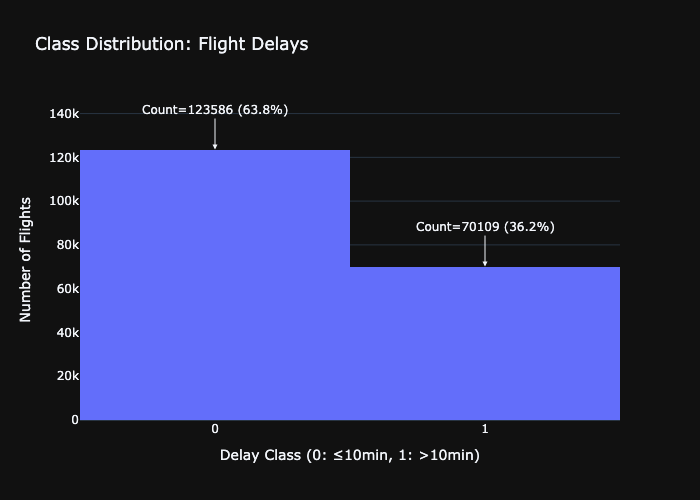

In [40]:
fig = px.histogram(
    df_merged,
    x="delay_target",
    title="Class Distribution: Flight Delays",
    labels={"delay_target": "Delay Class (0: ≤10min, 1: >10min)", "count": "Number of Flights"},
    histnorm=None
)

class_counts = df_merged["delay_target"].value_counts().sort_index()
annotations = [
    dict(
        x=cls,
        y=count,
        text=f"Count={count}\n({count/len(df_merged)*100:.1f}%)",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40
    )
    for cls, count in class_counts.items()
]

fig.update_layout(
    xaxis=dict(dtick=1),
    xaxis_title="Delay Class (0: ≤10min, 1: >10min)",
    yaxis_title="Number of Flights",
    width=700,
    annotations=annotations
)

fig.show()